# similarity metrics

In [204]:
import numpy as np
import matplotlib.pyplot as plt

#import distance metrics from sklearn
from sklearn.metrics import pairwise_distances

In [205]:
#parameters
vector_size = 100
num_permutations = 1000
num_simultaneous_permutations = 3

## similarity score functions

In [206]:
# all implementations approach 1 as the vectors are identical and 0 as they are orthogonal

def tanimoto_counted(x, y):
    return np.minimum(x, y).sum() / np.maximum(x, y).sum()

def dice_counted(x,y):
    return  2 * np.minimum(x, y).sum() / (x.sum() + y.sum())

def euclidean_counted(x, y):
    return 1 / (1 + np.linalg.norm(x - y)/len(x))

def cosine(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

def manhattan_counted(x, y):
    manh_d = np.sum(np.abs(x - y))
    return 1 / (1+ manh_d/len(x))

# def cosine(x, y):
#     return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))


## for binary vectors

## for counted vectors

In [207]:
x = np.random.randint(0, 20, vector_size)
print(x)

permutations = [x]
for i in range(num_permutations):
    # add or substract 1 from the vector at two random positions
    #select two random positions
    np.random.seed(i)
    positions = np.random.choice(vector_size, num_simultaneous_permutations, replace=False)
    y = permutations[-1].copy()
    for pos in positions:
        y[pos] += np.random.choice([-1, 1]) if y[pos] > 0 else np.random.choice([0, 1])

    
    permutations.append(y)

#make binary
permutations_bin = np.array(permutations) > 0
permutations_bin = permutations_bin.astype(int)

[ 1  1  2 11 18  1 17 15 19  4  1 13  2  2 18  8  4  2  1  9 19  6 17  9
 15  2  3 19  8 16 13 18  8 16 19  5  9  7 13  2 13  7  2  7 12  8  2 14
  3  4 12  1 19 14 17 17 17 13 16  6  8 15  6  4  8 12  3 17 14 11 19  2
 18  6 11 19  0 14 19  1  4 11  0  5  7 12 12  3 10  9 19  5 16  8  9 15
  7  3 18  3]


In [208]:
tanimotos = [tanimoto_counted(permutations[0], y) for y in permutations]
dices = [dice_counted(permutations[0], y) for y in permutations]
euclideans = [euclidean_counted(permutations[0], y) for y in permutations]
cosines = [cosine(permutations[0], y) for y in permutations]
manhattans = [manhattan_counted(permutations[0], y) for y in permutations]

tanimotos_bin = [tanimoto_counted(permutations_bin[0], y) for y in permutations_bin]
dices_bin = [dice_counted(permutations_bin[0], y) for y in permutations_bin]
euclideans_bin = [euclidean_counted(permutations_bin[0], y) for y in permutations_bin]
cosines_bin = [cosine(permutations_bin[0], y) for y in permutations_bin]
manhattans_bin = [manhattan_counted(permutations_bin[0], y) for y in permutations_bin]



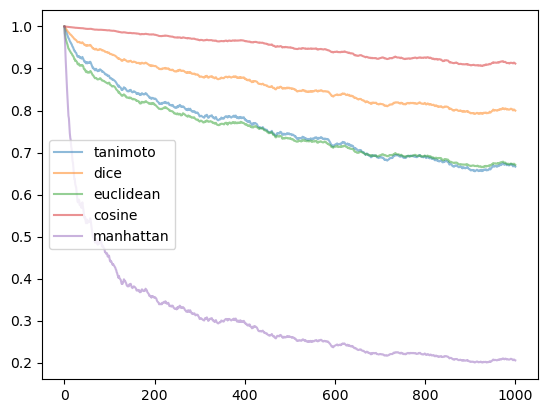

In [209]:
distances={'tanimoto': tanimotos,'dice': dices,  'euclidean': euclideans, 'cosine': cosines, 'manhattan': manhattans}
for key in distances:
    plt.plot(distances[key], label=key, alpha=0.5)

plt.legend()

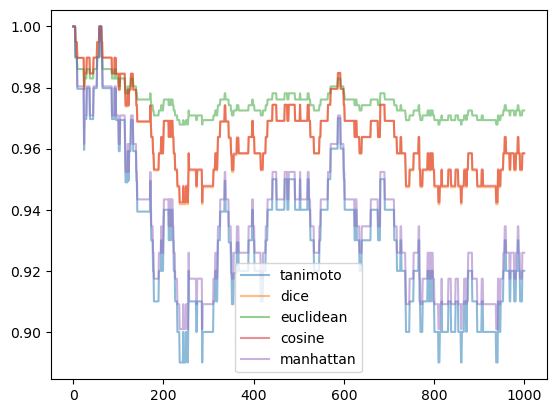

In [210]:
distances_bin={'tanimoto': tanimotos_bin,'dice': dices_bin,  'euclidean': euclideans_bin, 'cosine': cosines_bin, 'manhattan': manhattans_bin}
for key in distances_bin:
    plt.plot(distances_bin[key], label=key, alpha=0.5)
plt.legend()